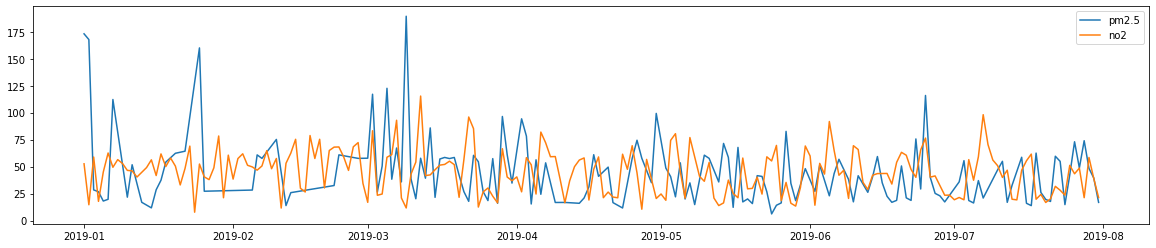

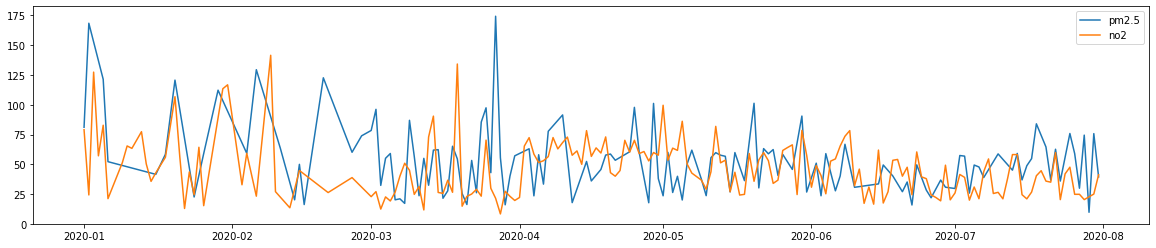

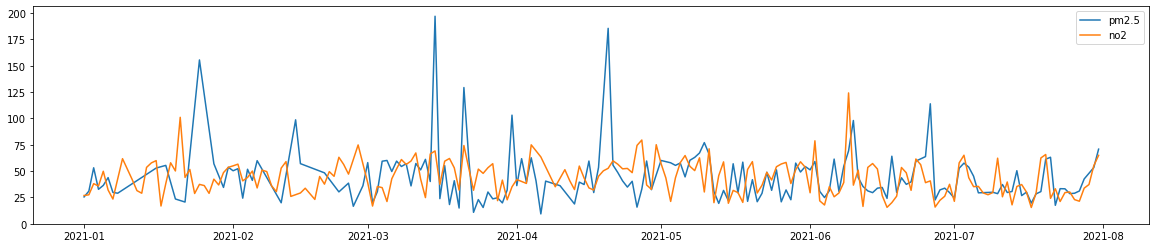

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv("train.csv") 

df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['day']})
df = df[df["Country"]=="Japan"]
df = df[df["City"]=="Miyazaki"]

df1 = pd.read_csv("train.csv") 
df1['date'] = pd.to_datetime({'year': df1['year'], 'month': df1['month'], 'day': df1['day']})
df1 = df1[df1["Country"]=="Japan"]
df1 = df1[df1["City"]=="Kagoshima"]



pl = df
pl1 = df1
pl_2019 = pl[(pl["date"] >= dt.datetime(2019,1,1)) & (pl["date"] < dt.datetime(2019,8,1))]
pl_20191 = pl1[(pl1["date"] >= dt.datetime(2019,1,1)) & (pl1["date"] < dt.datetime(2019,8,1))]

pl_2020 = pl[(pl["date"] >= dt.datetime(2020,1,1)) & (pl["date"] < dt.datetime(2020,8,1))]
pl_20201 = pl1[(pl1["date"] >= dt.datetime(2020,1,1)) & (pl1["date"] < dt.datetime(2020,8,1))]

pl_2021 = pl[(pl["date"] >= dt.datetime(2021,1,1)) & (pl["date"] < dt.datetime(2021,8,1))]
pl_20211 = pl1[(pl1["date"] >= dt.datetime(2021,1,1)) & (pl1["date"] < dt.datetime(2021,8,1))]

fig, ax = plt.subplots(facecolor="w",figsize=(20, 4))
ax.plot(pl_2019["date"], pl_2019["pm25_mid"], label="pm2.5")
#ax.plot(pl_2019["date"], pl_2019["co_mid"], label="co")
ax.plot(pl_20191["date"], pl_20191["pm25_mid"], label="no2")
#ax.plot(pl_20191["date"], pl_20191["so2_mid"], label="so2")
ax.legend()
plt.show()

fig, ax = plt.subplots(facecolor="w",figsize=(20, 4))
ax.plot(pl_2020["date"], pl_2020["pm25_mid"], label="pm2.5")
#ax.plot(pl_2019["date"], pl_2019["co_mid"], label="co")
ax.plot(pl_20201["date"], pl_20201["pm25_mid"], label="no2")
#ax.plot(pl_20191["date"], pl_20191["so2_mid"], label="so2")
ax.legend()
plt.show()

fig, ax = plt.subplots(facecolor="w",figsize=(20, 4))
ax.plot(pl_2021["date"], pl_2021["pm25_mid"], label="pm2.5")
#ax.plot(pl_2019["date"], pl_2019["co_mid"], label="co")
ax.plot(pl_20211["date"], pl_20211["pm25_mid"], label="no2")
#ax.plot(pl_20191["date"], pl_20191["so2_mid"], label="so2")
ax.legend()
plt.show()




In [103]:
df = pd.read_csv("train.csv") 

df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['day']})
df = df[df["City"]=="Pretoria"]

len(df)

252

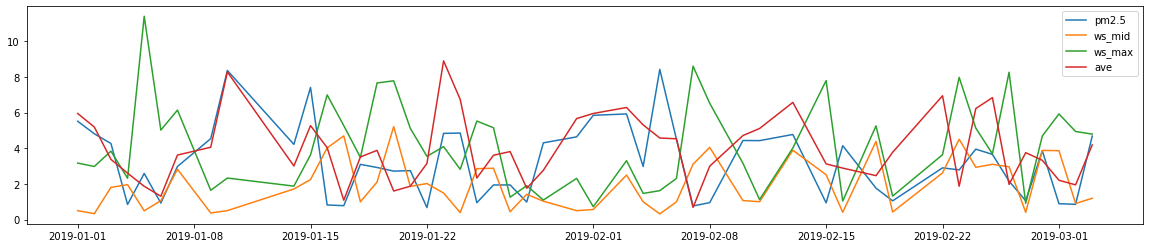

In [91]:
df = pd.read_csv("train.csv") 
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['day']})

#df = df[df["Country"]=="Japan"]
#df = df[df["City"]=="Kagoshima"]

df = df[df["Country"]=="Australia"]
df = df[df["City"]=="Wollongong"]


df["fukai"] = (0.81*df["temperature_mid"])+(0.01*df["humidity_mid"]*(0.99*df["humidity_mid"]-14.3))+46.3
#df["min_max"] = (df["co_mid"] + df["co_max"])/2

#df["co_ex"] = df["co_mid"] - df["min_max"]



from sklearn.preprocessing import StandardScaler
num_cols = ["pm25_mid","co_min","co_mid","co_max","no2_mid","so2_mid","co_cnt","no2_cnt"]

scaler = StandardScaler()
for i in num_cols:
    scaler.fit(df[num_cols])
    #df[num_cols] = scaler.transform(df[num_cols])



df["pm25_mid"] = df["pm25_mid"]/20
df["no2_mid"] = df["no2_mid"]/3
df["o3_mid"] = df["o3_mid"]/3
df["co_mid"] = df["co_mid"]/1.5

df["ave"] = (df["no2_mid"] + df["co_mid"] + df["o3_mid"] + df["co_min"] + df["no2_min"])/5

df["co_no"] = ((df["co_mid"]*0.6) + ((df["no2_mid"])*0.2) + (df["no2_min"]*0.2))
df = df.head(50)

fig, ax = plt.subplots(facecolor="w",figsize=(20, 4))
ax.plot(df["date"], df["pm25_mid"], label="pm2.5")
#ax.plot(df["date"], df["co_mid"], label="co_mid")
#ax.plot(df["date"], df["co_min"], label="co_min")
#ax.plot(df["date"], df["no2_min"], label="no2_min")
#ax.plot(df["date"], df["no2_mid"], label="no2_mid")
#ax.plot(df["date"], df["co_no"], label="co_no")
ax.plot(df["date"], df["ws_mid"], label="ws_mid")
ax.plot(df["date"], df["ws_max"], label="ws_max")
ax.plot(df["date"], df["ave"], label="ave")
ax.legend()
plt.show()

#df[["date","pm25_mid","co_no","o3_mid","ws_mid"]]

In [26]:
df = pd.read_csv("train.csv") 
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['day']})


df = df[df["Country"]=="Australia"]
df = df[df["City"]=="Wollongong"]
df = df.head(50)

from sklearn.preprocessing import StandardScaler
num_cols = ["pm25_mid","co_mid","co_min","co_max","no2_mid","no2_cnt","so2_mid","ws_mid","humidity_mid","temperature_mid","pressure_mid"]

scaler = StandardScaler()
for i in num_cols:
    scaler.fit(df[num_cols])
    df[num_cols] = scaler.transform(df[num_cols])

df["temp_hum"] = (df["humidity_mid"] / df["temperature_mid"])*df["pressure_mid"]
df["rate_co"] = ((df["co_mid"]+df["no2_mid"]+df["so2_mid"]+df["ws_mid"]+df["temp_hum"])/5) / df["pm25_mid"]
df["rate_no"] = df["no2_mid"] / df["pm25_mid"]

num_cols = ["date"] + num_cols
df[num_cols]

,date,pm25_mid,co_mid,co_min,co_max,no2_mid,no2_cnt,so2_mid,ws_mid,humidity_mid,temperature_mid,pressure_mid
5,2019-01-01,1.132543,0.669524,0.935442,1.069580,0.621365,-1.233739,0.921521,-1.051534,-0.688564,0.372275,0.324624
193,2019-01-02,0.782180,0.580713,0.913101,0.472669,0.943495,0.031991,-0.387198,-1.172204,0.197464,-1.040403,0.578105
392,2019-01-03,0.508932,0.307892,0.429478,2.070874,-0.237007,0.880447,1.872084,-0.114909,0.558650,-0.414455,0.261690
587,2019-01-04,-1.197756,0.343591,-0.629323,-0.480231,-0.444808,-0.524374,-1.111652,-0.005732,0.474263,-0.572895,0.243758
777,2019-01-05,-0.330565,-0.115270,-0.151395,-0.160277,-1.130913,-0.148828,-1.620850,-1.057280,0.212642,-0.464340,0.328453
969,2019-01-06,-1.159199,-1.380692,-1.020514,-1.218145,-0.443263,-1.178103,-1.459408,-0.651457,-1.035408,1.200787,0.215114
1180,2019-01-07,-0.134356,-0.767426,-0.507541,-0.694694,-0.485751,-1.150284,0.569695,0.617009,0.234900,0.351579,0.440508
1499,2019-01-09,0.644608,0.389738,1.009913,-0.180470,-0.019292,-0.093191,-0.443726,-1.145628,0.154580,1.221971,0.197981
1658,2019-01-10,2.554921,2.545890,3.493736,1.483014,2.477801,-0.162737,1.790685,-1.052253,0.971617,-0.094745,0.448190
2314,2019-01-14,0.484310,0.855855,-0.154899,0.654406,-0.508668,-0.023646,-0.409357,-0.179553,0.931202,-0.622193,0.395507


In [18]:
df = pd.read_csv("train.csv") 
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['day']})


df = df[df["Country"]=="Australia"]
df = df[df["City"]=="Wollongong"]
df = df.head(50)


# pm2.5はほかの濃度と比較して1000分の１


df["pm25_mid"] = df["pm25_mid"]/1000
df["co_var"] = np.sqrt(df["co_var"])
df[["co_mid","co_var","co_min","co_max","pm25_mid"]]

,co_mid,co_var,co_min,co_max,pm25_mid
5,7.159,5.545449,4.554,15.819,0.110224
193,6.853,3.889087,4.503,12.390,0.096194
392,5.913,8.548801,3.399,21.571,0.085252
587,6.036,2.829841,0.982,6.916,0.016909
777,4.455,3.298181,2.073,8.754,0.051635
969,0.095,1.277106,0.089,2.677,0.018453
1180,2.208,2.165179,1.260,5.684,0.059492
1499,6.195,1.931062,4.724,8.638,0.090685
1658,13.624,3.846687,10.394,18.194,0.167182
2314,7.801,5.569291,2.065,13.434,0.084266
